Alon Arbel - 205730849 - Gev Keren - 315719906


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain, product
%matplotlib inline



from matplotlib.pyplot import imshow, figure
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Math, Markdown

# Question 2 - Camera calibration

## Section A

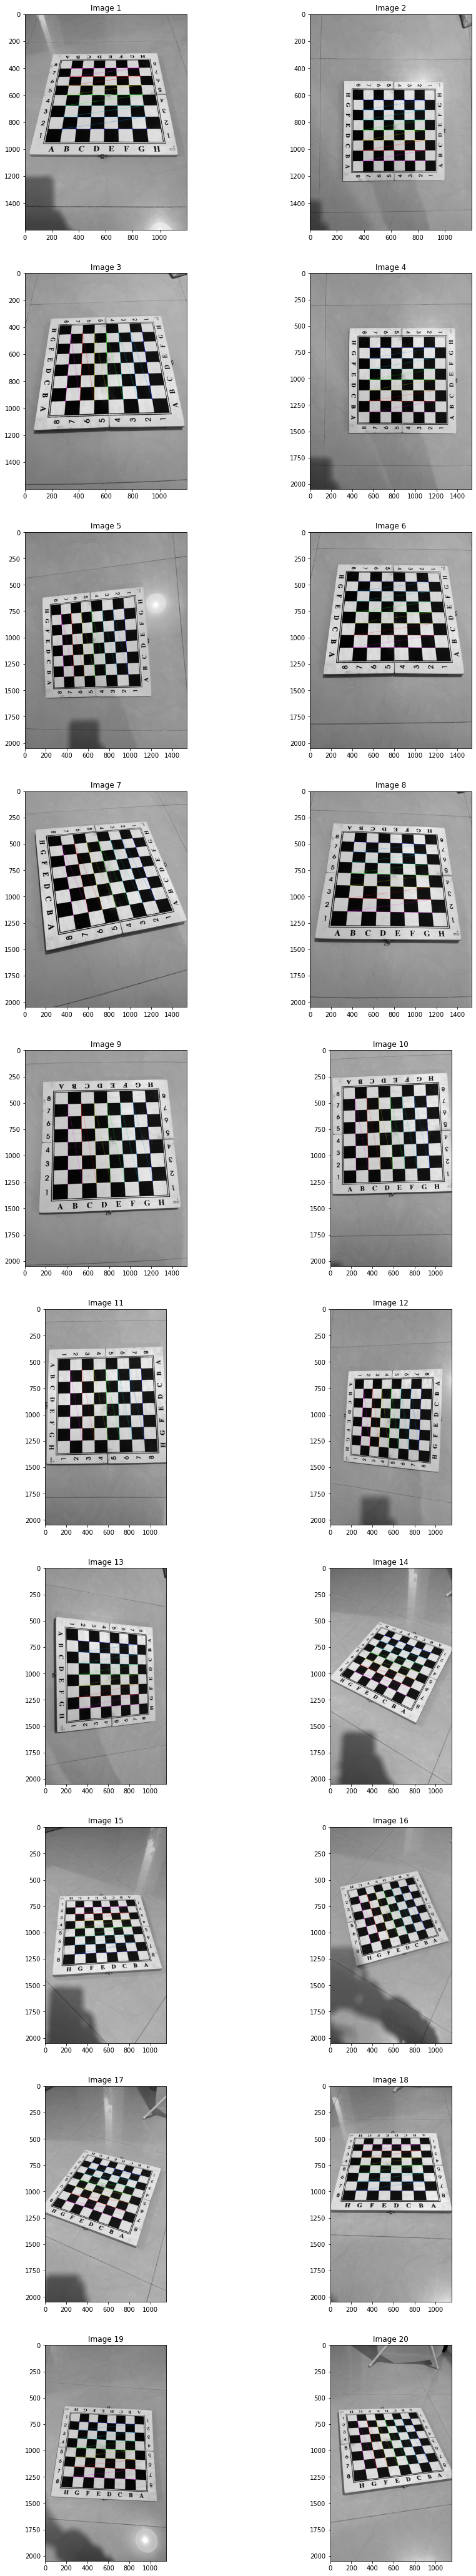

In [2]:
images = []
corners = []
pattern_size = (7,7)

for i in range (1,21):
  image = cv2.imread(f'chess_{i}.jpg', cv2.IMREAD_GRAYSCALE)
  images.append(image)
  
for i in range(20):
  found, image_corners = cv2.findChessboardCorners(images[i], pattern_size) 
  if found:
    corners.append(image_corners)

# opens empty graphs
_, axes = plt.subplots(10, 2,
                       figsize=(15,75))

for (i, image), ax in zip(enumerate(images), chain.from_iterable(axes)):
    ax.imshow(cv2.drawChessboardCorners(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB),
                                  pattern_size,
                                  corners[i],
                                  True))
              # figure=figure(figsize=(10, 10)))
    ax.set_title(f"Image {i+1}")

## Section B

In [3]:
world_points = []
xs, ys = pattern_size
world_points = np.array([(x, y, 0)
                         for y, x in product(range(ys), range(xs))],
                        dtype=np.float32)
print(world_points)

[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [0. 6. 0.]
 [1. 6. 0.]
 [2. 6. 0.]
 [3. 6. 0.]
 [4. 6. 0.]
 [5. 6. 0.]
 [6. 6. 0.]]


## Section C - Perform a calibration

In [4]:
# perform calibration here
retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(
    objectPoints=[world_points for i in range(20)],
    imagePoints=corners,
    imageSize=images[0].shape[::-1],
    cameraMatrix=None,
    distCoeffs=None)

print(cameraMatrix)
# cameraMatrix - The matrix that represents the intrinsic parameters of the camera.
# distCoeffs - Radial distortion occurs when light rays bend more near the edges of a lens than they do at its optical center.
#              Tangential distortion occurs when the lens and the image plane are not parallel.
#              In our case we assume there is no distortion.
# rvecs - Output vector of rotation vectors estimated for each pattern view.
# tvecs - Output vector of translation vectors estimated for each pattern view.

[[1.60377658e+03 0.00000000e+00 6.48050072e+02]
 [0.00000000e+00 1.60103401e+03 9.84188606e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


## Section D  - Camera matrix

In [5]:
# "cameraMatrix" refers to the matrix that holds the intrinsic values of the camera. In our case - K.

extrinsic_transformations = []
M_matrices = []
for tvec, rvec in zip(tvecs, rvecs):
  # R for rotation matrix 3x3
  R = cv2.Rodrigues(rvec)[0]
  # F = [R3x3 |T3x1]
  #     [0 0 0| 1  ]
  F = np.array([[R[0][0], R[0][1], R[0][2], tvec[0][0]],
              [R[1][0], R[1][1], R[1][2], tvec[1][0]],
              [R[2][0], R[2][1], R[2][2], tvec[2][0]],
              [0.0, 0.0, 0.0, 1.0]])

  extrinsic_transformations.append(F)
# C is the cameraMatrix resized for 3x4
C = np.c_[cameraMatrix, np.array([0.0, 0.0, 0.0])]
M_matrices = [np.matmul(C, x) for x in extrinsic_transformations]

for i in range(len(M_matrices)):
  print(M_matrices[i])
  print()

[[-1.61028626e+03  2.68567676e+02  5.71767228e+02  1.41489617e+04]
 [-2.01538500e+00 -1.01058263e+03  1.58450491e+03  1.34938235e+04]
 [-1.02050166e-02  4.36616182e-01  8.99590000e-01  1.59255598e+01]]

[[ 1.61785449e+03 -5.62700575e+01  6.09465947e+02  8.51855253e+03]
 [ 1.55058226e+01  1.49168263e+03  1.14305714e+03  1.37466778e+04]
 [ 2.23628031e-02 -1.02506194e-01  9.94480963e-01  2.14504856e+01]]

[[-1.97150622e+02 -1.61844489e+03  5.77785392e+02  1.55544734e+04]
 [ 1.07338726e+03  2.58117338e+01  1.54243660e+03  7.86134480e+03]
 [-3.99415477e-01 -2.45910932e-02  9.16440153e-01  1.78562011e+01]]

[[ 1.55069454e+03 -6.17939009e+01  7.63934649e+02  9.18165251e+03]
 [-7.26932851e+01  1.51824001e+03  1.10526018e+03  1.15023049e+04]
 [-7.49491756e-02 -7.90037839e-02  9.94052827e-01  1.61321034e+01]]

[[ 1.58535444e+01 -1.48451517e+03  8.87711423e+02  1.46065317e+04]
 [ 1.48105346e+03  2.60251282e+02  1.12724755e+03  1.13813594e+04]
 [-1.09686337e-01  1.49866471e-01  9.82603149e-01  1.5

## Section E

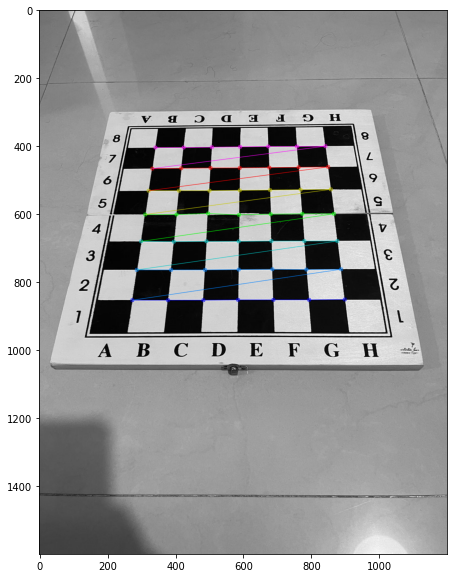

In [6]:
## Display the chessboard image here
image = images[0] # choosing chess_1

found, corners = cv2.findChessboardCorners(image, pattern_size) 
imshow(cv2.drawChessboardCorners(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) ,
                                pattern_size,
                                corners,
                                found),
      figure=figure(figsize=(10, 10)))


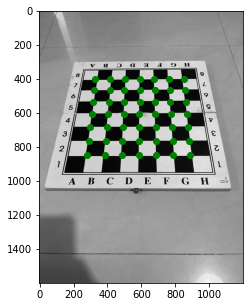

In [7]:
#Projection using camera matrix
image = cv2.cvtColor(images[0], cv2.COLOR_GRAY2RGB)

# creating homogonous points
homog_world_points = []
for point in world_points:
  homog_point = np.r_[point, [1.]]
  homog_world_points.append(homog_point)

# creates projected points
# C@p (where c is from M_matrices and p is a homogonous point)
projected_points = []
for point in homog_world_points:
  proj_point = np.matmul(M_matrices[0], point.transpose())
  projected_points.append(proj_point)

# convert back to cartesian
projected_cartesian = []
for x,y,z in projected_points:
  cartesian_point = [int(x//z), int(y//z)]
  projected_cartesian.append(cartesian_point)

_,ax = plt.subplots(figsize=(5,5))
ax.imshow(image)

# draw the dots
for x,y in projected_cartesian:
  ax.scatter(x, y, color="green") # only green ;)

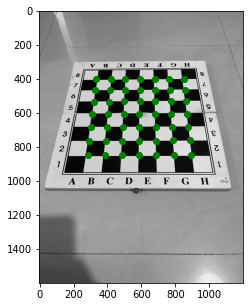

In [8]:
#Projection using cv2.projectPoints
image_cv = cv2.cvtColor(images[0], cv2.COLOR_GRAY2RGB)
openCV_points, jacob = cv2.projectPoints(objectPoints=world_points, 
                                         rvec=rvecs[0],
                                         tvec=tvecs[0],
                                         cameraMatrix=cameraMatrix,
                                         distCoeffs=distCoeffs)

_,ax = plt.subplots(figsize=(5,5))
ax.imshow(image_cv)
for cv_point in openCV_points:
  ax.scatter(cv_point[0][0], cv_point[0][1], color="green") # only green ;)

There is a slight difference between the two forms of pojections. The reason for this difference is the disconsideration of the noise in the first projection.
In the second projection, one of the arguments was distCoeffs, and that caused a better projection due to the fact we now considered the lens distortion.

## Section F

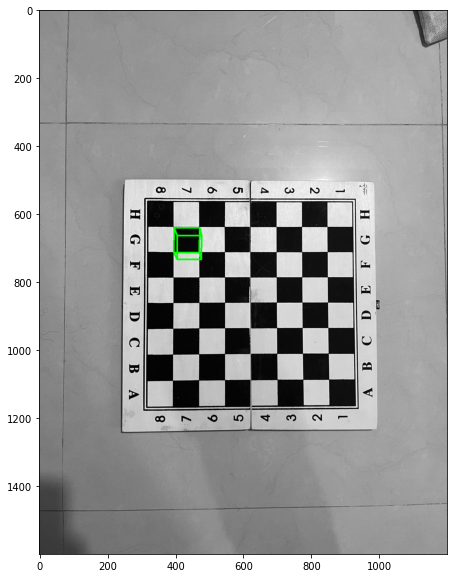

In [9]:
# Draw cube here
image_to_cube = cv2.cvtColor(images[1], cv2.COLOR_GRAY2RGB)
# we deliberately chosed a picture where there is a black box on the upper left side.
# therefore, our cube will be made with the dots 1,2,8,9 (our pattern_size is 7x7)
# choosing the top left black square
square_points = []
for i in [0,1,7,8]:
  square_points.append(world_points[i])
# giving the square some "height"
cube_points = []
for point in square_points:
  cube_points.append([point[0], point[1], 0.])
for point in square_points:
  cube_points.append([point[0], point[1], 1.])

# converting the cube points to homogeneous
cube_homog_points = []
for point in cube_points:
  homog_point = np.array([point[0], point[1], point[2], 1.]).transpose()
  cube_homog_points.append(homog_point)


cube_projected_homog = []
for point in cube_homog_points:
  proj_point = np.matmul(M_matrices[1], point)
  cube_projected_homog.append(proj_point)


cube_cartesians_points = []
for x,y,z in cube_projected_homog:
  cartesian_proj = (int(x//z), int(y//z))
  cube_cartesians_points.append(cartesian_proj)


image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[0], cube_cartesians_points[1], color=(0,255,0), thickness=3)
image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[0], cube_cartesians_points[2], color=(0,255,0), thickness=3)
image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[2], cube_cartesians_points[3], color=(0,255,0), thickness=3)
image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[1], cube_cartesians_points[3], color=(0,255,0), thickness=3)
image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[4], cube_cartesians_points[5], color=(0,255,0), thickness=3)
image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[4], cube_cartesians_points[6], color=(0,255,0), thickness=3)
image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[6], cube_cartesians_points[7], color=(0,255,0), thickness=3)
image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[5], cube_cartesians_points[7], color=(0,255,0), thickness=3)
image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[0], cube_cartesians_points[4], color=(0,255,0), thickness=3)
image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[1], cube_cartesians_points[5], color=(0,255,0), thickness=3)
image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[2], cube_cartesians_points[6], color=(0,255,0), thickness=3)
image_to_cube = cv2.line(image_to_cube, cube_cartesians_points[3], cube_cartesians_points[7], color=(0,255,0), thickness=3)

plt.figure(figsize = (10,10))
plt.imshow(image_to_cube)

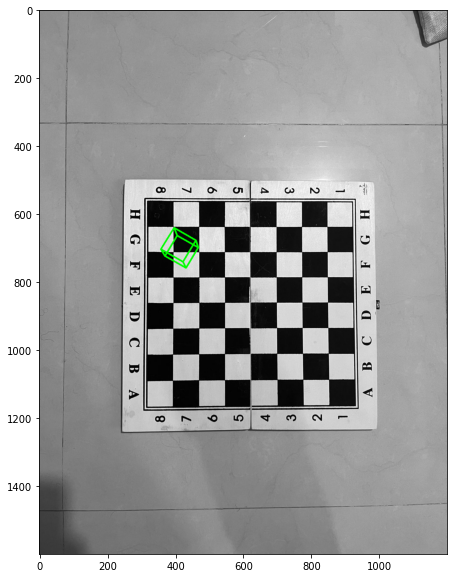

In [10]:
# Draw rotated cube here
image_to_cube_rotated = cv2.cvtColor(images[1], cv2.COLOR_GRAY2RGB)
# rotating with 30 degrees. 
# 30 degrees = pi/6

# creating a rotation matrix
def rotation_creation(theta_x=0, theta_y=0, theta_z=0): 
  Rx = np.array([[1, 0, 0], [0, np.cos(theta_x), -(np.sin(theta_x))], [0, np.sin(theta_x), np.cos(theta_x)]])
  Ry = np.array([[np.cos(theta_y), 0, (np.sin(theta_y))], [0, 1, 0], [-(np.sin(theta_y)), 0, np.cos(theta_y)]])
  Rz = np.array([[np.cos(theta_z), -(np.sin(theta_z)), 0], [np.sin(theta_z), np.cos(theta_z), 0] ,[0, 0, 1]])
  RyRx = np.matmul(Ry, Rx)
  RzRyRx = np.matmul(Rz, RyRx)
  return RzRyRx

rotation_matrix = rotation_creation(theta_z = np.pi/6)

# R3x3 |T3x1
# 0 0 0| 1
# adding a 0 transformation to create a 4x4 matrix
rotation_transformation_matrix = np.array([[rotation_matrix[0][0], rotation_matrix[0][1], rotation_matrix[0][2], 0.],
                                           [rotation_matrix[1][0], rotation_matrix[1][1], rotation_matrix[1][2], 0.],
                                           [rotation_matrix[2][0], rotation_matrix[2][1], rotation_matrix[2][2], 0.],
                                           [0., 0., 0., 1.]])
rotated_points = []
for point in cube_homog_points:
  rotated_point = np.matmul(rotation_transformation_matrix, point)
  rotated_points.append(rotated_point)

cube_rotated_projected_homog = []
for point in rotated_points:
  proj_rotated_point = np.matmul(M_matrices[1], point)
  cube_rotated_projected_homog.append(proj_rotated_point)


cube_rotated_cartesians_points = []
for x,y,z in cube_rotated_projected_homog:
  cartesian_rotated_proj = (int(x//z), int(y//z))
  cube_rotated_cartesians_points.append(cartesian_rotated_proj)

image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[0], cube_rotated_cartesians_points[1], color=(0,255,0), thickness=3)
image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[0], cube_rotated_cartesians_points[2], color=(0,255,0), thickness=3)
image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[2], cube_rotated_cartesians_points[3], color=(0,255,0), thickness=3)
image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[1], cube_rotated_cartesians_points[3], color=(0,255,0), thickness=3)
image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[4], cube_rotated_cartesians_points[5], color=(0,255,0), thickness=3)
image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[4], cube_rotated_cartesians_points[6], color=(0,255,0), thickness=3)
image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[6], cube_rotated_cartesians_points[7], color=(0,255,0), thickness=3)
image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[5], cube_rotated_cartesians_points[7], color=(0,255,0), thickness=3)
image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[0], cube_rotated_cartesians_points[4], color=(0,255,0), thickness=3)
image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[1], cube_rotated_cartesians_points[5], color=(0,255,0), thickness=3)
image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[2], cube_rotated_cartesians_points[6], color=(0,255,0), thickness=3)
image_to_cube_rotated = cv2.line(image_to_cube_rotated, cube_rotated_cartesians_points[3], cube_rotated_cartesians_points[7], color=(0,255,0), thickness=3)
plt.figure(figsize = (10,10))
plt.imshow(image_to_cube_rotated)


**Section G** - 
Yes, there is a problem with this approach.
We needed the pictures to be from the same camera, because, we want to calibrate a specific camera with the pictures we took.
If the student brought some images from the internet, it could be from different cameras, and therefore we wouldnt be able to get a precise details on the camera.
